# The Perceptron

The *Perceptron* is on of the simplest Artificial neural network architectures, proposed in 1957 by Frank Rosenblatt. It is based on a *threshold logic unit (TLU)* and it computes a weighted sum of its inputs

$$ z = w_1x_1 + \cdots + w_nx_n = \textbf{x}^{\intercal}\textbf{w} $$

then applies a step function to that sum and outputs the result: $h_w(\textbf{x})=\text{step}(\textbf{x})$. One of the most common step function used is the *Heaviside step function*

$$ \text{heaviside}(z) = \begin{cases} 0 & \text{if } z<0 \\ 1 & \text{if } z\gt0 \end{cases}$$

A single TLU can be used for binary classification; it computes a linear combination of its inputs and if the output reaches a threshold, it outputs a positive class, otherwise outputs the negative class.

A perceptron is composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer the layer is called a *fully connected* or *dense* layer. *Input Neurons* are simple inputs that output whatever they are fed and all input neurons form the *input layer*. A bias neuron is generally added, tipycally represented by a *bias neuron*, which outputs 1 all the time. (e.g. architecture pg 286 fig 10-5)

We can then write the outputs of a fully connected layer as 
$$ h_{\textbf{W, b}}(\textbf{X}) = \phi(\textbf{XW + b})$$
Where
- $\textbf{X}$ is the matrix of input features (one row per instance, one col per feature)
- $\textbf{W}$ contains the connection weights, except the ones from the bias neuron (one row per input neuron, one column per artificial neuron in the layer)
- $\phi$ is called the *activation function* (when the neurons are TLU, this is a step function)

The perceptron learning rule reinforces connections between neurons tha help reduce the error: the perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong predictions, it reinforces the connection weights from the inputs that would have contributed to the correct prediction

$$ w_{i,j}^{\text{next step}} = w_{i,j} +\eta(y_j - \hat{y_j})x_i$$

where 
- $w_{i,j}$ is the weight between ith input neuron and jth output neuron
- $x_i$ is the ith input value of the current training instance
- $\hat{y_j}$ is the output of the jth output neuron 
- $y_j$ is the target output of the jth ouptut neuron
- $\eta$ is the learning rate

# The multilayer perceptron and backpropagation

An MLP consistis of one input layer, one or more layers of TLUs (called *hidden layers*) and one final layer of TLUs called the *output layer*. Every except the output layer includes a bias neuron and is fully connected to the next layer.

To train an MLP, we use [backpropagation](https://homl.info/44). In short, it is Gradient Descent and it is able to compute the gradient of the network's error with regard to every single model parameter, thus it is able to find out how much it should tweak each connection weight and bias in order to reduce the error. This process is called *autodiff*, appendix D has more info on it.

Here's how it works
- It handles one mini-batch at a time (e.g. 32 instances) and goes through the training set multiple times, each pass is called an *epoch*
- Each mini-batch is passed is passed to the network's input layer, which sends it to the first hidden layer. The algorithm then computes the outputs of this layer and passes it to the next layer, and so on, until we get the output of the output layer. This is called a *forward pass* and the intermediate results are saved
- Next we calculate the network's output error (using some loss function)
- Then it computs how much each output connection contributed to the error (done using chain rule)
- The algorithm then measures how much of these error contributions came from each connection in the layer below until it reaches the input layer
- Finally, it performs a gradient descent step to tweak all the connection weights in the network

One change that had to be made to the original MLP architecture was replacing the step function with the logistic function $\sigma(z) = 1 / (1 +\exp(-z))$, this allows for gradients to be computed as it is a smooth function.

Some other choices of function are:
- Hyperbolic tan $\tanh(z) = 2\sigma(2z) - 1$

Another S-shaped function, continues and differentiable. Its outputs are in the range -1 to 1, making each layer's output more or less centered around 0 at the beginning of training, which helps speed up convergence.

- Rectified Linear unit $ReLU(z) = \max(0,z)$

Continuous but not differentiable at $z=0$, however it works very well and has become the default.

Activation functions are useful because they can add non-linearity to each layer. Recall that a linear transformation of linear transformations is also linear. Using a non-linear function allows for an MLP to learn more complex patterns.

## Regression MLPs

To use MLP for regression we use an output neuron for each value we want to predict. In the univariate case (e.g. predicting house price) only a single output neuron is needed. 

For multivariate problems, you need one output neuron per output dimension. For example to locate the center of an object in an image, you need to predict 2D coordinates, thus 2 output neurons. If you also want to place a bounding box around the object, you need two more numbers, the width and height of the object. In total, 4 output neurons.

In general we do not want to use any activation function for output neurons so they are free to output any range of values. To guarantee the range of values is always positive, use ReLU or *softplus*, which is a smooth variant of ReLU: $\text{softplus}(z) = \log(1 + \exp(z))$. 
Finally if we want to guarantee the predictions will fall between a range of values we can use the logistic or hyperbolic tangent function, scaling the labels to the appropriate values.

The typical loss function used is MSE, however if you have a lot of outliers in your training set you may want to use the mean absolute error instead. Alternatively use [Huber loss](https://en.wikipedia.org/wiki/Huber_loss), which is a combination of both.


Typical regression MLP architecture

| Hyperparameter | Typical value |
|     ---        |      ---      |
|# input neurons | One per input feature (e.g. 28x28=784 for MNIST) | 
|# hidden layers | Variable (typically 1 to 5) |
|# neurons per hidden layers | Variable (typically 10 to 100) |
|# output layer | 1 per prediction dimension |
|Activation function | $\begin{cases} 
                        \text{None} & \text{ for any range of values } \\ 
                        ReLU/\text{softplus} & \text{ positive outputs }\\
                        \text{logistic/tanh} & \text{ bounded outputs}
                        \end{cases}$ |
|Loss Function | MSE or MAE/Huber (if outliers)|

## Classification MLPs

For binary classification, we just need a single output neuron using the logistic activation function. The output will be in the range 0 - 1 and we can interpret it as an estimated class probability of the positive class. The estimated probability for the negative class is one minus that number.

MLPs can also be used for multilabel binary classification. For example, in an e-mail classification system that tags messages as spam/ham and urgent/non-urgent we would use two output neurons with the logistic function. The first outputs the probability that the e-mail is spam and the second the probability the e-mail is urgent. 
More generally, we use one output neuron for each positive class.

For multiclass calssification (e.g. identifying digit classes 0 through 9), then we need one output neuron per class and should use the softmax activation to ensure estimated probabilities are between 0-1 and they add up to 1.

For the loss function, since we're preducting probability distributions, the cross-entropy loss is generally a good choice

Typical classification MLP architecture

| Hyperparameter | Binary Classification | Multilabel Binary Classification | Multiclass Classification | 
| --- | --- | --- | --- |
|# input neurons | One per input feature | One per input feature | One per input feature |
|# hidden layers | Variable (typically 1 to 5) | Variable (typically 1 to 5) | Variable (typically 1 to 5) |
|# neurons per hidden layers | Variable (typically 10 to 100) | Variable (typically 10 to 100)| Variable (typically 10 to 100)|
|# output neurons | 1 | 1 per label | 1 per class |
|Activation Function| Logistic | Logistic | Softmax |
|Loss Function | Cross Entropy | Cross Entropy | Cross Entropy |

# Exercise 1
Play around in the [Tensorflow Playground](https://playground.tensorflow.org) to get a better feeling for ANNs and explore the following:

# Implementing MLPs with Keras

## Building an Image Classifier using the Sequential API

In this chapter, we will tackle Fashion MNIST, which is a drop-in replacement of MNIST. The images represent fashion items instead of digits, so each class is more diverse.

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train_full.shape

(60000, 28, 28)

Data is loaded as ints in the range from 0 to 255. Let's create a validation set and scale the features

In [3]:
X_train_full.dtype

dtype('uint8')

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

We need to map the target values to their actual class as well

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Creating the model using the Sequential API
We'll start by creating a classification MLP with two hidden layers

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=[28,28])) # Converts inputs to 1D array
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


The Sequential API is the simplest kind of model for NNs that are just composed of a single stack of layers connected sequentially. Another way to write the same model could be as follows

In [8]:
model = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])

We can vew a definition of the model by using summary()

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Since the model has a lot of parameters, it has a lot of flexibility to train the data. However this also means that it runs the risk of overfitting, especially when we don't have much training data.

We can view a model's Layers

In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense_4'

As well as it's weights and biases

In [12]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04130178,  0.04122939,  0.05185226, ...,  0.03959126,
        -0.04257523,  0.02830424],
       [-0.07055026,  0.05017821, -0.03449353, ..., -0.01324287,
        -0.02289219, -0.07043223],
       [-0.06730034,  0.00134465,  0.00183922, ..., -0.04859115,
        -0.05091444, -0.01537013],
       ...,
       [-0.03324409, -0.01379194, -0.0341923 , ...,  0.0124127 ,
        -0.05074498, -0.00316779],
       [ 0.00126698, -0.06556682,  0.04718859, ...,  0.04622825,
         0.04819635,  0.07382867],
       [-0.01058099, -0.06618245, -0.01807966, ..., -0.04497568,
         0.05197492, -0.06534347]], dtype=float32)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Note the weights are initialized randomly (to break simmetry) and the biases set to zero. To use other initialization methods we can set the ```kernel_initializer``` or ```bias_initializer``` when creating the layer.

Next we compile the model

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

We use ```sparse_categorical_crossentropy``` because we have sparse labels (i.e. for each instance there is only a single target class) and the classes are exclusive. If instead we had one target probability per class for each instance  (such as one-hot vectors for a single class) we'd use ```categorical_crossentropy``` instead. 

The optimizer set to ```sgd``` means we'll train the model using simple stochastic gradient descent. 

Finally, we can fit the model

In [15]:
RELOAD = False
CHAPTER_DIR = 'saved_models/10_intro_to_anns/'

In [16]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model1.h5')
    history = model.history
else:
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model1.h5')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 108us/step - loss: 0.7186 - accuracy: 0.7651 - val_loss: 0.5364 - val_accuracy: 0.8194
Epoch 2/30
55000/55000 [==============================] - 6s 103us/step - loss: 0.4887 - accuracy: 0.8307 - val_loss: 0.4379 - val_accuracy: 0.8560
Epoch 3/30
55000/55000 [==============================] - 6s 105us/step - loss: 0.4444 - accuracy: 0.8454 - val_loss: 0.4360 - val_accuracy: 0.8480
Epoch 4/30
55000/55000 [==============================] - 6s 109us/step - loss: 0.4169 - accuracy: 0.8551 - val_loss: 0.4349 - val_accuracy: 0.8452
Epoch 5/30
55000/55000 [==============================] - 6s 106us/step - loss: 0.3962 - accuracy: 0.8620 - val_loss: 0.3795 - val_accuracy: 0.8710
Epoch 6/30
55000/55000 [==============================] - 6s 107us/step - loss: 0.3785 - accuracy: 0.8663 - val_loss: 0.3840 - val_accuracy: 0.8616
Epoch 7/30
55000/55000 [==============================] - 7s 12

Note: instead of passing a validation set, you can also set the ```validation_split``` argument of the ```fit``` method to the ratio of the training set you want Keras to use for validation. 

If the training set is very skewed, with some classes being underrepresented, it can be useful to set the ```class_weight``` parameter, this would give larger weight to underrepresented classes and a lower weight to overrepresented classes.

If you need per instance weights, the ```sample_weight``` can be used. Per-instance weights can be useful if some instances are labelled by experts while others were labeled using a crowdsourcing platform: we might want to give more weights to the former.

We can access the ```history.history``` to access the loss and accuracy of the model

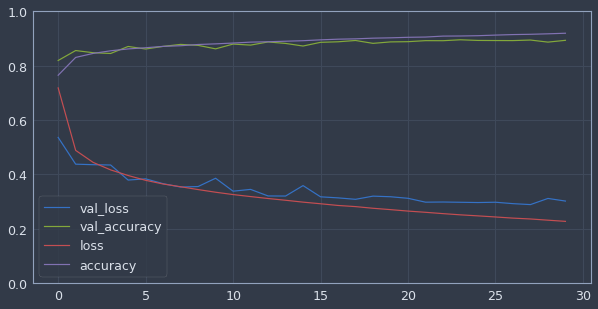

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

It looks like the model performed better on the validation set than on the training set at the beginning, but this is not true.

The validation error is computed at the *end* of each epoch while the training error is computed using a running mean *during* each epoch. So the training curve should actually be shifted half an epoch to the left. 

We can also tell that the model has not quite converged yet as the validation is still going down. We can continue training from where we left off by calling the fit method again.

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 85us/step - loss: 0.2238 - accuracy: 0.9199 - val_loss: 0.3600 - val_accuracy: 0.8776
Epoch 2/20
55000/55000 [==============================] - 5s 84us/step - loss: 0.2200 - accuracy: 0.9211 - val_loss: 0.2978 - val_accuracy: 0.8940
Epoch 3/20
55000/55000 [==============================] - 5s 82us/step - loss: 0.2165 - accuracy: 0.9230 - val_loss: 0.2908 - val_accuracy: 0.8952
Epoch 4/20
55000/55000 [==============================] - 4s 80us/step - loss: 0.2132 - accuracy: 0.9240 - val_loss: 0.2958 - val_accuracy: 0.8948
Epoch 5/20
55000/55000 [==============================] - 4s 82us/step - loss: 0.2103 - accuracy: 0.9258 - val_loss: 0.3096 - val_accuracy: 0.8908
Epoch 6/20
55000/55000 [==============================] - 5s 85us/step - loss: 0.2067 - accuracy: 0.9267 - val_loss: 0.2955 - val_accuracy: 0.8958
Epoch 7/20
55000/55000 [==============================] - 5s 86us/ste

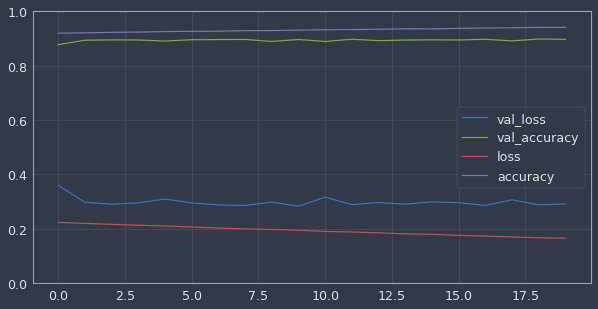

In [18]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model1_hist2.h5')
    history2 = model.history
else:
    history2 = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model1_hist2.h5')

pd.DataFrame(history2.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

To improve the model's performance, we perform our usual task: tuning hyperparameters.

The first one to check is the learning rate. If that doesn't help we should check the optimizer (always re-tuning the learning rate after changing any other hyperparameter). If performance is still not great, we can tune the architecture, by changing the number of layers, neurons in each hidden layer and the activation function in the hidden layers.

To estimate the generalisation error, we use the ```evaluation()``` method

In [19]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 45us/step


[77.22435361785888, 0.8424999713897705]

### Making Predictions

Let's use this model to make predictions on the first 3 instances of the test set

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

For each instance, the model estimated the probability per class, from class 0 to class 9. If we don't care about probabilities and only want the class that has the highest probability we can use ```predict_classes()``` instead.

In [21]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [22]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

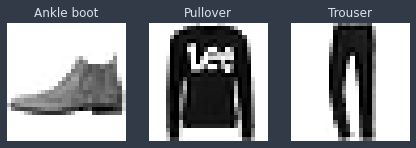

In [23]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Building a regression MLP using the Sequential API

We'll use scikit-learn to import a simplified version of the California housing dataset (only numerical features and no missing values). 

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Building the model is pretty similar to the steps taken for the example above. Since we're predicting house prices we only need 1 output and the output layer won't use an activation function and, we'll also use mean squared error as the error function. 

Since the dataset is noisy, we'll use a single layer with a few neurons to avoid overfitting.

In [25]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model2.h5')
else:
    model = Sequential([
        Dense(30, activation='relu', input_shape=X_train.shape[1:]),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='sgd')
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model2.h5')

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 36us/step - loss: 1.6890 - val_loss: 0.5816
Epoch 2/20
11610/11610 [==============================] - 0s 34us/step - loss: 0.5183 - val_loss: 0.4979
Epoch 3/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.4755 - val_loss: 0.4715
Epoch 4/20
11610/11610 [==============================] - 0s 30us/step - loss: 0.4482 - val_loss: 0.4615
Epoch 5/20
11610/11610 [==============================] - 0s 31us/step - loss: 0.4339 - val_loss: 0.4465
Epoch 6/20
11610/11610 [==============================] - 0s 31us/step - loss: 0.4191 - val_loss: 0.4310
Epoch 7/20
11610/11610 [==============================] - 0s 30us/step - loss: 0.4108 - val_loss: 0.4252
Epoch 8/20
11610/11610 [==============================] - 0s 33us/step - loss: 0.4058 - val_loss: 0.4202
Epoch 9/20
11610/11610 [==============================] - 0s 30us/step - loss: 0.4014 - val_loss: 0.4677
Epoch 

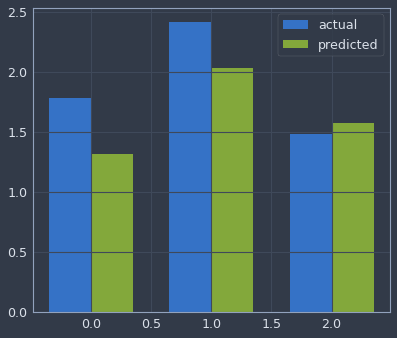

In [26]:
fig, ax = plt.subplots()

width = 0.35
actual = y_test[:X_new.shape[0]]
preds = y_pred.reshape(1,-1)[0]
x_pos = np.arange(X_new.shape[0])

ax.bar(x= x_pos-width/2.0, height=actual, width=width, label='actual')
ax.bar(x= x_pos+width/2.0, height=preds, width=width, label='predicted')
ax.legend()
fig.show()

The sequential API is quite easy to use, however for more complex models Keras offers the Functional API.

## Building complex models with the Functional API

One example of a non-sequential networs is a *Wide and Deep* NN, which was first introduced in a [2016 paper](https://homl.info/widedeep). This architecture allows for the Neural Net to learn both deep pattens (using the deep path) and simple rules (through the short path) (example image on page 309).

In contrast, a regular MLP forces the data to go through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

One example network for the California housing dataset:

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
from keras.layers import Input

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

Here's a breakdown of what's happening in the code above:
- We create an Input object, containint a specification of what type of input the model will get (a model may have multiple inputs)
- Next create a Dense layer, with 30 neurons using ReLU. We call it like a function passing it the inputs (hence functional api)
- Create a second hidden layer as above and use it as a function. We pass it the outputs of the first hidden layer
- Next we use the ```concatenate``` function, which creates a Concatenate layer and pass calls it with the given inputs
- Create output layer with single neuron, passing it the result of concatenation
- Finally create the model, specifying the inputs and outputs

Now that's done we do exactly as above, comple, train, evaluate the model and use it to make predictions

What if we wanted to send some features through the wide path and a different subset (possibly overlapping) through the deep path (see fig on pg 310)? One solution is to use multiple inputs. For example we could send 5 features through the wide path (feats 0 to 4) and six through the deep path (feats 2 to 7)

In [29]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

A good tip is to name the most important layers, especially as the model gets more complex. Also note that we specified ```inputs=[input_A, input_B]``` so when we're calling the fit method we need to pass a pair of matrices (X_train_A, X_train_B).

In [30]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model3.h5')
else:    
    history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                         validation_data=((X_valid_A, X_valid_B), y_valid))
    model.save(CHAPTER_DIR + 'model3.h5')
    
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7658 - val_loss: 0.8695
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7801 - val_loss: 0.7507
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6871 - val_loss: 0.6771
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6407 - val_loss: 0.6491
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6106 - val_loss: 0.6198
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5870 - val_loss: 0.5976
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5691 - val_loss: 0.5790
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5562 - val_loss: 0.5757
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5454 - val_loss: 0.5611
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5348 - val_loss: 0.5517

There are also cases where you may want to have multiple outputs:
- The task may demand it; e.g. locate and classify the object in a picture. This is both regression task (finding the coordinates of the object center) and classification task
- There may be multiple independent tasks based on the same data. For example you could perform *multitask classification* on pictures of faces to classify the person's facial expression and another to identify whether they're wearing sunglasses or not
- Another use case is as a regularization technique. For example you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network (see fig 10-16 pg 312)

To add extra outputs, simply connect them to the appropriate layers and add them to the model's list of outputs

In [31]:
# Continuing from the architecture above
# ...
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output needs its own loss function, when compiling the model we need to passa list of losses (or a single loss, Keras will assume that the same loss must be used for all). By default, Keras will compute all these losses and simply add them to arrive at a final loss for training. If we care more about the main output's loss, we can specify loss weights when compiling

In [32]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

Now when training the model we also need to pass the labels to the auxiliary output. In this case they're trying to predict the same output so we just pass y_train again

In [33]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model4.h5')
else:
    history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                        validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
    model.save(CHAPTER_DIR + 'model4.h5')

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8033 - main_output_loss: 0.6813 - aux_output_loss: 1.9013 - val_loss: 0.5733 - val_main_output_loss: 0.5098 - val_aux_output_loss: 1.1440
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5602 - main_output_loss: 0.5030 - aux_output_loss: 1.0746 - val_loss: 0.8491 - val_main_output_loss: 0.8043 - val_aux_output_loss: 1.2525
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5306 - main_output_loss: 0.4822 - aux_output_loss: 0.9659 - val_loss: 0.5141 - val_main_output_loss: 0.4727 - val_aux_output_loss: 0.8866
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4989 - main_output_loss: 0.4592 - aux_output_loss: 0.8561 - val_loss: 0.4993 - val_main_output_loss: 0.4650 - val_aux_output_loss: 0.8077
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4901 - main_output_loss: 0.4573 - aux_output_loss: 0.7855 - val_loss

When we evalute the model, keras returns the total loss as well as the individual losses.

In [34]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 865us/step - loss: 0.3532 - main_output_loss: 0.3376 - aux_output_loss: 0.4943


Similarly for the ```predict()``` method

In [35]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Subclassing to build Dynamic Models

The sequential and functional API are delcarative; you specify which layers you want to use and how are they connected. This means they're easily saved, used, cloned and shared among other advantages. The flip side is that they're static.

Some models may have loops, branches, varying shapes and other dynamic behaviors. For these, you can use the subclassing API.

Simply sublclass the Model class and create the layers you want in the ```call()``` method. The example below builds a class for the ```WideAndDeepModel``` discussed above.

In [36]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

Usage is similar to the functional API, except we do not need to create the inputs. We just use the input argument to the ```call()``` method and separaate the creation of layers in the constructor from their usage in the ```call()``` method. This enables you to use loops, if statements, low-level tensorflow operations, etc...

The cost is that the model architecture is hidden behind the call method. Keras cannot check types, and shapes ahead of time and it is easier to make mistakes. 

**Note:** Keras models can be used like regular layers so you can easily combine them to build complex architectures.

## Saving and restoring a model

Keras uses HDF5 to save the model's architecture and the values of the model parameters for every layer (weights and biases). It also saves the optimizer. You would have seen the save function scattered through this notebook and the load function as well to re-store the models


Note that this works when using the Sequential or Functionla APIs but not when using model subclassing. You can use ```save_weights()``` and ```load_weights()``` to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

## Using Callbacks

What if training lasts several hours? Which is quite common, especially on large datasets. In this case we should not only save the final model but save at regular checkpoints during training to avoid losing everything due to a crash. 

The ```fit()``` method accepts a ```callbacks``` argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch.

The ```ModelCheckpoint``` callback saves checkpoints at regular intervals during training, at the end of each epoch. Moreover, if we use a validation set while training, you can set ```save_best_only=True``` when creating the model checkpoint. Then it only saves the model when its performance on the validation set is the best so far. This way we don't need to save the train the model for too long and overfitting the training set: simply restore the last model saved after training and this will be the best model on the validation set. 
The following is a simple way of implementing early stopping.

In [37]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint(CHAPTER_DIR + "my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model(CHAPTER_DIR + "my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 1.7886 - val_loss: 0.9643
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7927 - val_loss: 0.7443
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6983 - val_loss: 0.6865
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6517 - val_loss: 0.6484
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6197 - val_loss: 0.6207
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5956 - val_loss: 0.6000
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5770 - val_loss: 0.5816
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5618 - val_loss: 0.5700
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5486 - val_loss: 0.5581
Epoch 10/10
162/162 [==============================] - 0s 905us/step - loss: 0.4948


Another way of implementing early stopping is to simply use the ```EarlyStopping``` callback. It interrupts training when it measures no progress on the validation set for a number of epochs (defined by the ```patience``` arg). You can combine both callbacks to save checkpoints of your model and interrupt training early when there is no more progress.

In [38]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5268 - val_loss: 0.5369
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5181 - val_loss: 0.5316
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5100 - val_loss: 0.5229
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5031 - val_loss: 0.5182
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4967 - val_loss: 0.5117
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4906 - val_loss: 0.5059
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4850 - val_loss: 0.4989
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4801 - val_loss: 0.4966
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4754 - val_loss: 0.4925
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4710 - val_lo

This way we can also set the number of epochs to a large value since training will stop when there's no more progress.

You can also write your own custom callbacks. Below is an example of a callback that displays the ratio between validation loss and the training loss during training (e.g. to detect overfitting).

In [39]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

336/363 [==========================>...] - ETA: 0s - loss: 0.3636
val/train: 1.05
363/363 [==============================] - 0s 1ms/step - loss: 0.3650 - val_loss: 0.3834


We can also implement ```on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end()```. They can also be used during evaluation and predictions (e.g. for debugging), see notes on pg 316 for more on that.

### Using TensorBoard for Vizualisation

TensorBoard is a neat viz tool that allows us to visualize training losses, learninng curves, view images generated by the model and others.

To set it up we need to configure the TensorBoard server and its *event files*. In general you want to point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs, this way the same server instances allows you to see and compare data from multiple runs, without getting things mixed up

In [40]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

And Keras provides a ```TensorBoard()``` callback

In [41]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3644 - val_loss: 0.3830
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3635 - val_loss: 0.3822
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3629 - val_loss: 0.3832
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3623 - val_loss: 0.3820
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3618 - val_loss: 0.3809
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3611 - val_loss: 0.3814
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3604 - val_loss: 0.3799
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3600 - val_loss: 0.3800
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3595 - val_loss: 0.3791
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3587 - val_loss: 0.3784

Next we start the TensorBoard server with the following:

``` tensorboard --logdir=./my_logs --port=6006 ```

Then visit http://localhost:6006

Note: to start tensorboard within Jupyter use the following:

``` %load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006```

Additionally, TensorFlow offers a lower-level API in the tf.summary package. You can use the following snippet to write logs to be visualized with TensorBoard

In [42]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        data = (np.random.randn(100)+2)*step / 100 # random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # Random 32x32 RGB images
        tf.summary.image("my_images", images*step/1000, step=step)
        texts = [f"The step is {step}. Its square is {step**2}"]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-tuning Neural Network Hyperparameters

One approach to tuning the many NN hyperparameters is to try many combinations and see which ones work best. We can use ```GridSearchCV``` or ```RandomSearchCV``` for this, we just have to wrap our Keras models in objects that mimic Scikit-Learn regressors. 

The first step is to create a function that builds and compiles the Keras model.

In [43]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Next we create a KerasRegressor based on this build_model

In [44]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

This is a thin wrapper around the Keras model built using build_model, using the pre-defined hyperparameters. Now we can use it like a regular Scikit-Learn regressor

In [45]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10), 
                        tensorboard_cb])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
mse_test

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0945 - val_loss: 0.7070
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6606 - val_loss: 0.6223
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5812 - val_loss: 0.5627
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5373 - val_loss: 0.5315
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5107 - val_loss: 0.5147
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4934 - val_loss: 0.5013
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4812 - val_loss: 0.4863
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4722 - val_loss: 0.4784
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4647 - val_loss: 0.4755
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4588 - val_lo

-0.3450339734554291

Any ```**kwargs``` passed to the fit method are passed to the underlying Keras model. Note the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e. higher is better)

Now we can use ```RandomizedSearchCV``` to explore the number of hidden layers, neurons and learning rate

In [46]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [0, 1, 2, 3],
    "n_neurons" : np.arange(1,100),
    "learning_rate" : reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                  validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10), tensorboard_cb])

Epoch 1/50
242/242 [==============================] - 0s 2ms/step - loss: 1.8607 - val_loss: 0.6564
Epoch 2/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5778 - val_loss: 0.5728
Epoch 3/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5520 - val_loss: 0.5640
Epoch 4/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5459 - val_loss: 0.5586
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5400 - val_loss: 0.5555
Epoch 6/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5367 - val_loss: 0.5634
Epoch 7/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5332 - val_loss: 0.6019
Epoch 8/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5352 - val_loss: 0.5577
Epoch 9/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5314 - val_loss: 0.5485
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5279 - val_loss: 0.6002

Epoch 27/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5353 - val_loss: 0.5589
Epoch 28/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5362 - val_loss: 0.5552
Epoch 29/50
121/121 [==============================] - 0s 786us/step - loss: 0.5140
Epoch 1/50
242/242 [==============================] - 0s 2ms/step - loss: 4.7675 - val_loss: 3.6583
Epoch 2/50
242/242 [==============================] - 0s 2ms/step - loss: 3.1342 - val_loss: 2.4915
Epoch 3/50
242/242 [==============================] - 0s 2ms/step - loss: 2.1928 - val_loss: 1.8176
Epoch 4/50
242/242 [==============================] - 0s 2ms/step - loss: 1.6419 - val_loss: 1.4220
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 1.3145 - val_loss: 1.1850
Epoch 6/50
242/242 [==============================] - 0s 2ms/step - loss: 1.1162 - val_loss: 1.0403
Epoch 7/50
242/242 [==============================] - 0s 2ms/step - loss: 0.9937 - val_loss: 0.9495
Epoch 8/50
242

Epoch 28/50
242/242 [==============================] - 0s 1ms/step - loss: 0.6152 - val_loss: 0.6304
Epoch 29/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6114 - val_loss: 0.6268
Epoch 30/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6080 - val_loss: 0.6234
Epoch 31/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6045 - val_loss: 0.6200
Epoch 32/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6012 - val_loss: 0.6170
Epoch 33/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5980 - val_loss: 0.6142
Epoch 34/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5950 - val_loss: 0.6115
Epoch 35/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5920 - val_loss: 0.6085
Epoch 36/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5892 - val_loss: 0.6057
Epoch 37/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5866 - val_los

Epoch 8/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5699 - val_loss: 0.5874
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5559 - val_loss: 0.5738
Epoch 10/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5439 - val_loss: 0.5670
Epoch 11/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5341 - val_loss: 0.5550
Epoch 12/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5250 - val_loss: 0.5461
Epoch 13/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5177 - val_loss: 0.5399
Epoch 14/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5108 - val_loss: 0.5329
Epoch 15/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5053 - val_loss: 0.5276
Epoch 16/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5003 - val_loss: 0.5241
Epoch 17/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4958 - val_loss:

Epoch 18/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5434 - val_loss: 0.5490
Epoch 19/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5351 - val_loss: 0.5737
Epoch 20/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5614 - val_loss: 0.5502
Epoch 21/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5413 - val_loss: 0.5521
Epoch 22/50
121/121 [==============================] - 0s 785us/step - loss: 0.5575
Epoch 1/50
242/242 [==============================] - 1s 2ms/step - loss: 1.3048 - val_loss: 0.5862
Epoch 2/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5655 - val_loss: 0.5636
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5575 - val_loss: 0.5539
Epoch 4/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5537 - val_loss: 0.5525
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5853 - val_loss: 0.5485
Epoch 6/50
2

242/242 [==============================] - 0s 2ms/step - loss: 0.5361 - val_loss: 0.5563
Epoch 36/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5358 - val_loss: 0.5564
Epoch 37/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5358 - val_loss: 0.5567
Epoch 38/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5357 - val_loss: 0.5570
Epoch 39/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5356 - val_loss: 0.5553
Epoch 40/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5354 - val_loss: 0.5566
Epoch 41/50
121/121 [==============================] - 0s 805us/step - loss: 0.5149
Epoch 1/50
242/242 [==============================] - 1s 2ms/step - loss: 1.0510 - val_loss: 0.6177
Epoch 2/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6052 - val_loss: 0.5869
Epoch 3/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5874 - val_loss: 0.5786
Epoch 4/50
242/242 [==

242/242 [==============================] - 0s 2ms/step - loss: 0.6493 - val_loss: 0.6593
Epoch 10/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6344 - val_loss: 0.6465
Epoch 11/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6211 - val_loss: 0.6352
Epoch 12/50
242/242 [==============================] - 0s 2ms/step - loss: 0.6088 - val_loss: 0.6246
Epoch 13/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5977 - val_loss: 0.6150
Epoch 14/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5875 - val_loss: 0.6059
Epoch 15/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5782 - val_loss: 0.5974
Epoch 16/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5695 - val_loss: 0.5898
Epoch 17/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5615 - val_loss: 0.5826
Epoch 18/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5541 - val_loss: 0.5758
Ep

Epoch 19/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4027 - val_loss: 0.4236
Epoch 20/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4066 - val_loss: 0.4185
Epoch 21/50
242/242 [==============================] - 0s 2ms/step - loss: 0.3970 - val_loss: 0.4164
Epoch 22/50
242/242 [==============================] - 0s 2ms/step - loss: 0.3954 - val_loss: 0.4255
Epoch 23/50
242/242 [==============================] - 0s 2ms/step - loss: 0.3966 - val_loss: 0.4249
Epoch 24/50
242/242 [==============================] - 0s 2ms/step - loss: 0.3909 - val_loss: 0.4241
Epoch 25/50
242/242 [==============================] - 0s 2ms/step - loss: 0.3923 - val_loss: 0.4112
Epoch 26/50
242/242 [==============================] - 0s 2ms/step - loss: 0.3896 - val_loss: 0.4132
Epoch 27/50
242/242 [==============================] - 0s 2ms/step - loss: 0.3862 - val_loss: 0.4156
Epoch 28/50
242/242 [==============================] - 0s 2ms/step - loss: 0.3851 - val_los

242/242 [==============================] - 0s 2ms/step - loss: 0.5339 - val_loss: 0.5777
Epoch 7/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5298 - val_loss: 0.7441
Epoch 8/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5428 - val_loss: 0.5681
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5354 - val_loss: 0.5597
Epoch 10/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5270 - val_loss: 0.7073
Epoch 11/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5331 - val_loss: 0.5564
Epoch 12/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5384 - val_loss: 0.5571
Epoch 13/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5317 - val_loss: 0.5541
Epoch 14/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5308 - val_loss: 0.5528
Epoch 15/50
242/242 [==============================] - 0s 2ms/step - loss: 0.5276 - val_loss: 0.5482
Epoch

242/242 [==============================] - 0s 2ms/step - loss: 0.4244 - val_loss: 0.4482
Epoch 30/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4228 - val_loss: 0.4456
Epoch 31/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4234 - val_loss: 0.4435
Epoch 32/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4217 - val_loss: 0.4493
Epoch 33/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4199 - val_loss: 0.4775
Epoch 34/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4181 - val_loss: 0.4384
Epoch 35/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4162 - val_loss: 0.4435
Epoch 36/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4167 - val_loss: 0.4373
Epoch 37/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4132 - val_loss: 0.4367
Epoch 38/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4132 - val_loss: 0.4558
Ep

Epoch 9/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4958 - val_loss: 0.4976
Epoch 10/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4907 - val_loss: 0.4929
Epoch 11/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4853 - val_loss: 0.4900
Epoch 12/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4814 - val_loss: 0.4867
Epoch 13/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4773 - val_loss: 0.4852
Epoch 14/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4734 - val_loss: 0.4831
Epoch 15/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4706 - val_loss: 0.4741
Epoch 16/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4671 - val_loss: 0.4703
Epoch 17/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4655 - val_loss: 0.4714
Epoch 18/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4651 - val_loss

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f59111978e0>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

Randomized search works well for many fairly simple problems, however when training is slow, this approach only explores a tiny portion of the hyperparameter space.

You can first run a quick Random search using wide ranges of hyperparparameter values, then run another search using smaller ranges of values centered on the best ones found during the first ones, and so one. This, however, is a very time consuming approach.

Here are some Python libraries you can use to optimize hyperparameters

[Hyperopt](https://github.com/hyperopt/hyperopt)
    - Popular library for optimization over all sorts of complex seach spaces (include real and discrete values)
    
[Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt), [Talos](https://github.com/autonomio/talos)
    - Useful for optimizing Keras hyperparameters
    
[Keras tuner](https://homl.info/kerastuner)
    - Library by Google for Keras models with hosted service for visualization and Analysis
    
[Scikit-Optimize(skopt)](https://scikit-optimize.github.io)
    - General purpose optimization library. ```BayesSearchCV``` performs optimization similarly to GridSearchCV
    
[Spearmint](https://github.com/JasperSnoek/spearmint)
    - Bayesian optimization library
    
[Hyperband](https://github.com/zygmuntz/hyperband)
    - Fast hyperparameter tuning library based on the recent Hyperband paper
    
[Sklearn-Deap](https://github.com/rsteca/sklearn-deap)
    - Based on evolutionary algorithms with GridSearchCV-like interface

### Number of Hidden Layers

For many problems, begin with a single hidden layer. Provided it has enough neurons, an MLP with a single hidden layer can model even the mode complex functions. But for complex problems, deep networks have a much higher *parameter efficiency* than shallow ones: they can model comples functions using exponentially fewer neurons, allowing for better performance with the same amount of training data.

Analogy of the forest on pg 324 explains why this happens. It boils down to low layers learning simple patterns, middle layers combine these into intermediate structures and high level layers combine these into high level structures.

This also improves theis ability to generalize to new datasets. Re-utilizing the weights of pre-trained models or models trained for similar tasks is called *transfer learning*.

In summary, start with one or two hidden layers. For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set.

### Number of neurons per hidden layer

As discussed, the number of neurons in the input and output layers is determined by the type of input and output your task requires.

For the hidden layers, it used to be common to stack them as a pyramid, with fewer and fewer neurons at each layer - the rationale being that many low-level features can coalesce into far fewer high-level features. In practice, using the same numbers of neurons in each all hidden layers performs just as well or even better in some cases plus, there's only one hyperparameter to tune. With that said, it can sometimes help to make the first hidden layer bigger than the others, depending on the size of the dataset.

In practice, it is a good strategy to pick a model with more layers and neurons than you're going to need and use early stopping and other regularization techniques to prevent it from overfitting. The 'stretch pants' approach. 

In general increasing the number of layers has more expected value than increasing the number of neurons.

### Learning Rate, Batch Size, other hyperparameters

#### *Learning Rate*

Arguably the most important parameter. In general, the optimal learning rate is about half the maximum learning rate (i.e. the learning rate above which the training algorithm diverges. One good approach is to train the model for a few hundred iterations with a very low learning rate (e.g. $10^{-5}$) and gradually increase it to a large value (e.g. 10). 

This is done by multiplying the learning rate by a constant factor at each iteration (e.g. by $\exp(\log(10^6)/500)$ to go from $1e-5$ to 10 in 500 iterations). If you plot the loss function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while the learning rate will be too large, so the loss will shoot back up.

#### *Optimizer*

More details on chapter 11

#### *Batch Size*

This can have a significant impact on the training time and performacee. large batch sizes benefit from hardware acceleators like GPUs and can be trained more instances per second. Thus many researchers and practictioners recommed using the largest batch size that can fit in GPU RAM.

Here's the catch: In practice, large batch sizes often lead to training instabilities, especially at the beginning of training and the resulting model may not generalize as well. There's arguments for both small and large batch sizes. The book recommend suggests using a large batch size using learning rate warm-up and if training is unstable or the final performance is disappointing then try using a small batch instead.

#### *Activation Function*
In general, ReLU is a good default for hidden layers. For the output layer, it depends on your task.

#### *Number of iterations*
In most cases the number of iterations does not actually need to be tweaked: just use early stopping instead.

*Note:* The optimal learning rate depends on other hyperparameters (especially batch size) so if you tweak any hyperparameter, update the learning rate as well!

For more best practices regarding tuning hyperparameters, read this [paper by Leslie Smith](https://homl.info/1cycle)